In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mobile_usage_behavioral_analysis.csv")
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [3]:
# lets come up with some questions with this dataset
# 1. What age group in grous of 10 or 5 who are the highest users of mobile phones?
# 2. Which Locations top in Social media, Productivity  and Gaming App usages?
# 3. Which age groups top in daily Screen time per Location?

#### Basic data analysis and checks

In [4]:
# Size and shape of the dataset
num_rows, num_columns = df.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

Number of Rows: 1000
Number of Columns: 10


In [5]:
# Datatypes of each field
print("Data type of each column:\n", df.dtypes)

Data type of each column:
 User_ID                           int64
Age                               int64
Gender                           object
Total_App_Usage_Hours           float64
Daily_Screen_Time_Hours         float64
Number_of_Apps_Used               int64
Social_Media_Usage_Hours        float64
Productivity_App_Usage_Hours    float64
Gaming_App_Usage_Hours          float64
Location                         object
dtype: object


In [9]:
# Search for specific column for text pattern
pattern = 'New'
matching_rows = df[df['Location'].str.contains(pattern, case=False, na=False)]
print('Rows with pattern in location:\n', matching_rows)

Rows with pattern in location:
      User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
4          5   38    Male                   6.31                    12.59   
9         10   28    Male                   1.80                     4.11   
15        16   39    Male                   4.54                     6.82   
20        21   19  Female                   1.45                     1.64   
27        28   59  Female                   7.74                     6.16   
..       ...  ...     ...                    ...                      ...   
980      981   50  Female                   1.28                    13.75   
986      987   19  Female                   4.75                    13.37   
990      991   50    Male                   5.90                     9.75   
991      992   55    Male                   9.68                     6.31   
992      993   30  Female                   8.04                    12.51   

     Number_of_Apps_Used  Social_Media_Usag

#### Standard plots and dataset overview

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

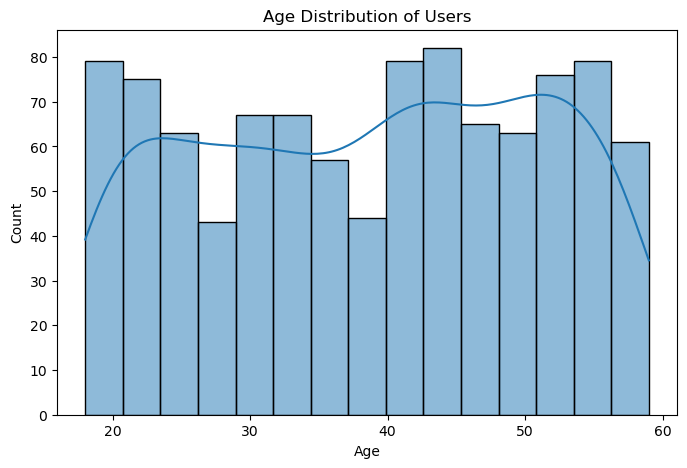

In [17]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

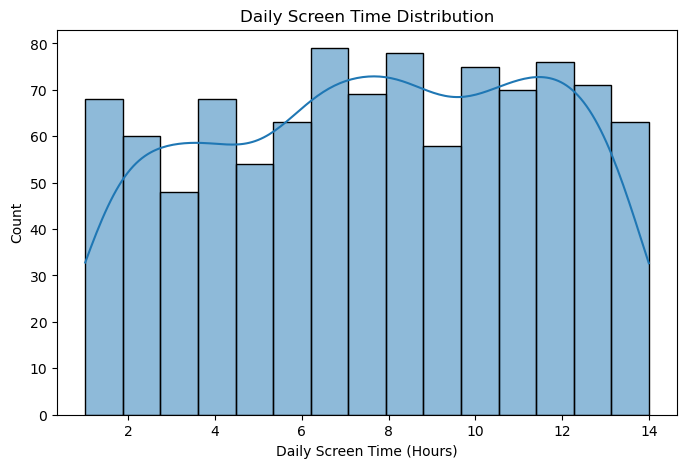

In [20]:
# Daily screen time distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily_Screen_Time_Hours'], bins=15, kde=True)
plt.title("Daily Screen Time Distribution")
plt.xlabel("Daily Screen Time (Hours)")
plt.ylabel("Count")
plt.show()

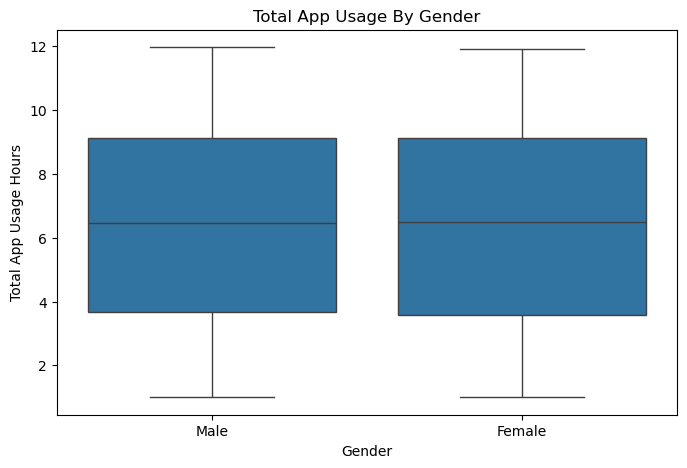

In [22]:
# Total App usage by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Gender", y="Total_App_Usage_Hours")
plt.title("Total App Usage By Gender")
plt.xlabel("Gender")
plt.ylabel("Total App Usage Hours")
plt.show()

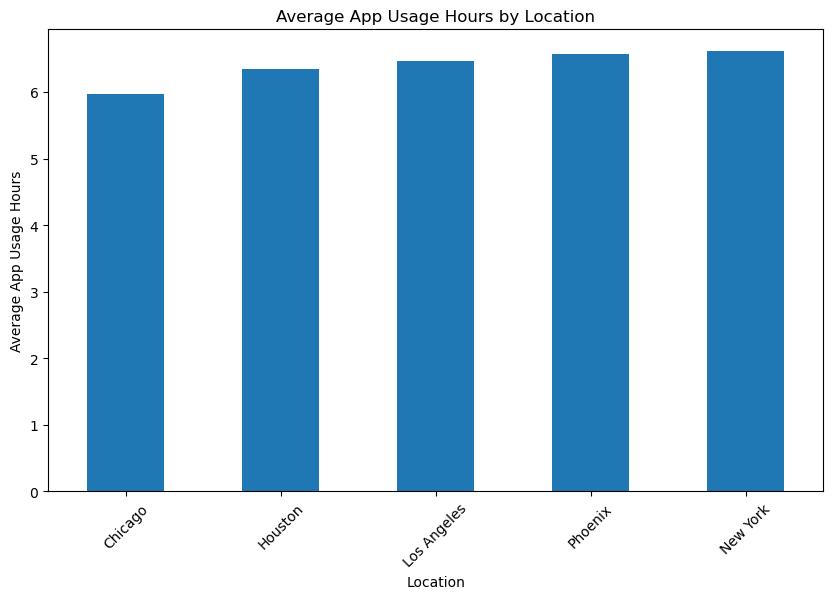

In [25]:
# Average app usage by location
location_usage = df.groupby('Location')['Total_App_Usage_Hours'].mean().sort_values()
plt.figure(figsize=(10, 6))
location_usage.plot(kind='bar')
plt.title("Average App Usage Hours by Location")
plt.xlabel("Location")
plt.ylabel("Average App Usage Hours")
plt.xticks(rotation=45)
plt.show()

#### Deeper Analysis

##### Exploring Summary Statistics

In [26]:
# Summary statistics for numerical columns
print("Summary statistics:\n", df.describe())

Summary statistics:
            User_ID          Age  Total_App_Usage_Hours  \
count  1000.000000  1000.000000            1000.000000   
mean    500.500000    38.745000               6.405670   
std     288.819436    12.186734               3.134855   
min       1.000000    18.000000               1.000000   
25%     250.750000    28.000000               3.590000   
50%     500.500000    40.000000               6.455000   
75%     750.250000    50.000000               9.122500   
max    1000.000000    59.000000              11.970000   

       Daily_Screen_Time_Hours  Number_of_Apps_Used  Social_Media_Usage_Hours  \
count              1000.000000           1000.00000               1000.000000   
mean                  7.696310             16.64700                  2.456330   
std                   3.714187              7.61961                  1.439525   
min                   1.010000              3.00000                  0.000000   
25%                   4.530000             10.00000

##### Distribution of Users by Age Groups

In [28]:
# Adding age group column
age_bins = [0, 10, 30, 45, df['Age'].max()]
age_labels = ['Under 18', '18-30', '30-45', '45+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

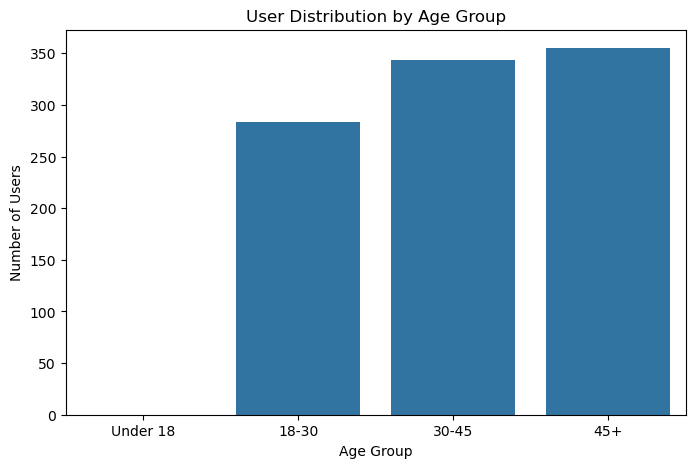

In [30]:
# Age group distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age_Group')
plt.title("User Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

##### Gender Based Analysis of App Usage and Screen TIme

In [31]:
# Gender based app usage and screen time statistics
gender_usage_stats = df.groupby('Gender')[['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours']].mean()
print("Average usage by Gender:\n", gender_usage_stats)

Average usage by Gender:
         Total_App_Usage_Hours  Daily_Screen_Time_Hours
Gender                                                
Female               6.388054                 7.632464
Male                 6.422128                 7.755957


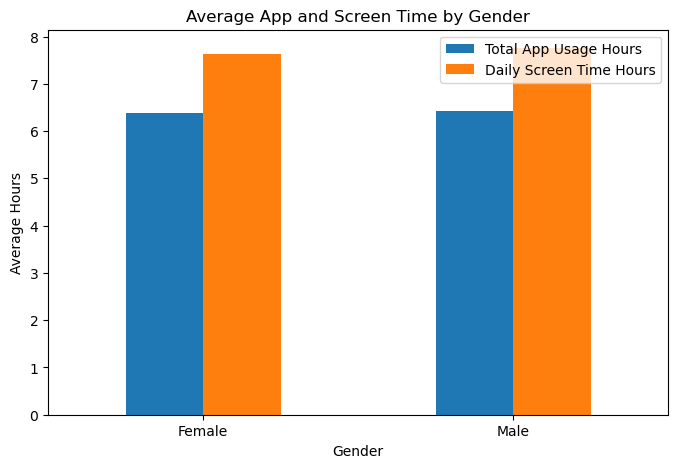

In [34]:
# Plotting
gender_usage_stats.plot(kind='bar', figsize=(8, 5))
plt.title("Average App and Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Hours")
plt.xticks(rotation=0)  # Default is 90
plt.legend(['Total App Usage Hours', 'Daily Screen Time Hours'])
plt.show()

##### Correlation Matrix

In [38]:
# Encode 'Gender' and 'Location' as integers if they are relevant for correlation analysis
df_encoded = df.copy()

# Convert 'Gender' to numeric
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Drop any other n/a values
df_encoded = df_encoded.select_dtypes(include=[int, float])

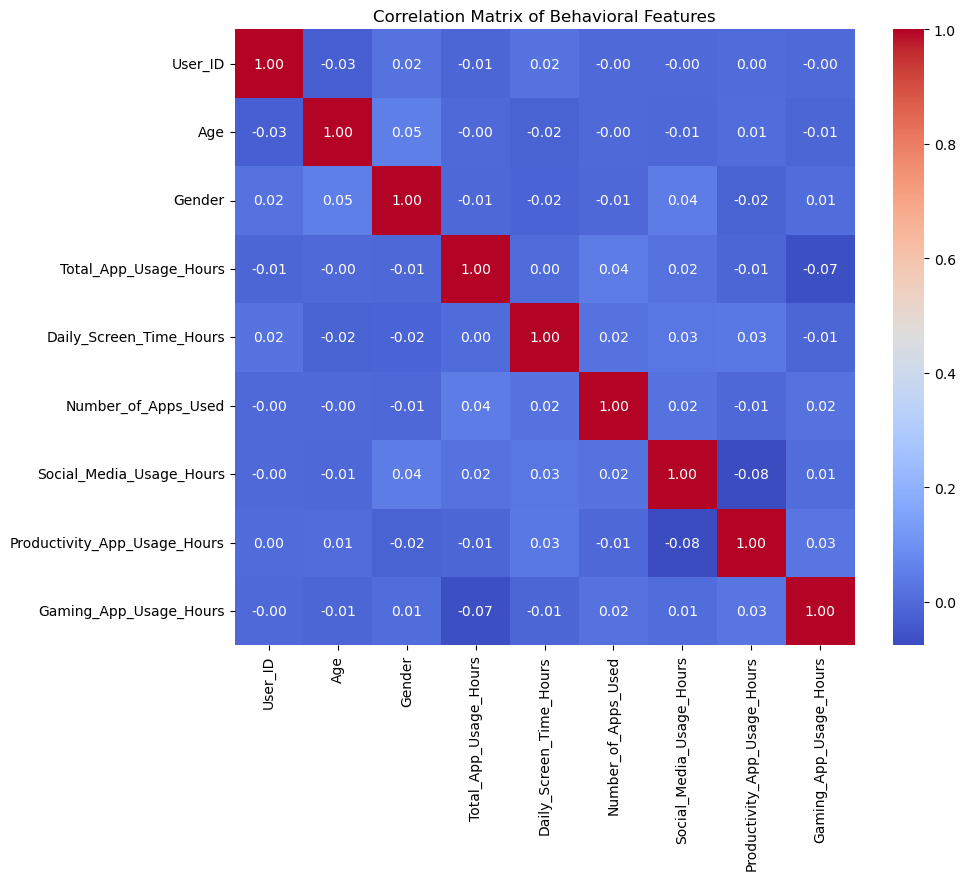

In [39]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Behavioral Features")
plt.show()

##### Top Locations by App Usage

In [41]:
# Top locations by app usage
top_locations = df.groupby('Location')['Total_App_Usage_Hours'].mean().sort_values(ascending=False).head(10)
print("Top locations by average app usage:\n", top_locations)

Top locations by average app usage:
 Location
New York       6.610412
Phoenix        6.572864
Los Angeles    6.462108
Houston        6.343204
Chicago        5.977760
Name: Total_App_Usage_Hours, dtype: float64


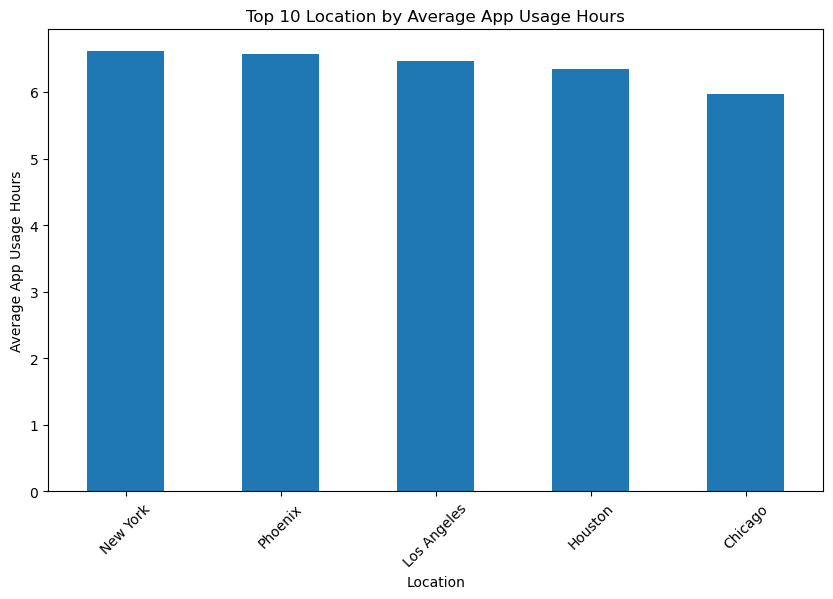

In [43]:
# Plotting
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.title("Top 10 Location by Average App Usage Hours")
plt.xlabel("Location")
plt.ylabel("Average App Usage Hours")
plt.xticks(rotation=45)
plt.show()

##### Social Media vs productivity App Usage Analysis

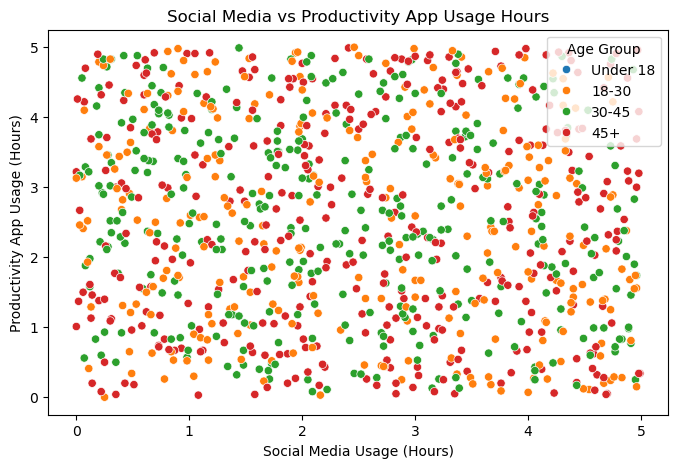

In [46]:
# Scatter plot for social media vs productivity app usage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Social_Media_Usage_Hours", y="Productivity_App_Usage_Hours", hue="Age_Group")
plt.title("Social Media vs Productivity App Usage Hours")
plt.xlabel("Social Media Usage (Hours)")
plt.ylabel("Productivity App Usage (Hours)")
plt.legend(title="Age Group")
plt.show()

##### App Usage Segmentation

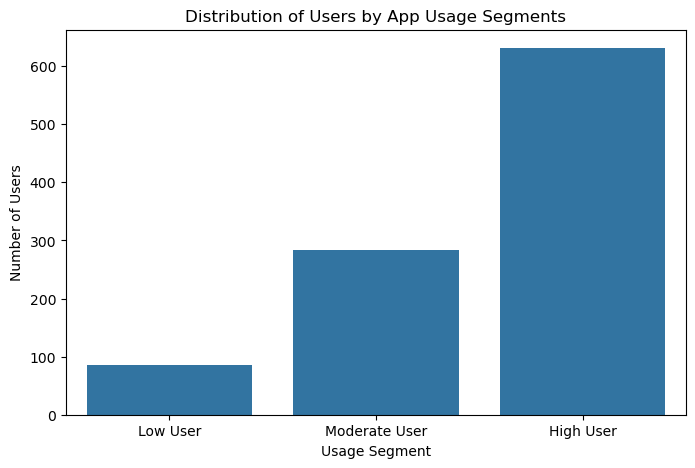

In [47]:
# Segmentation based on Total App Usage Hours
usage_bins = [0, 2, 5, df['Total_App_Usage_Hours'].max()]
usage_labels = ['Low User', 'Moderate User', 'High User']
df['Usage_Segment'] = pd.cut(df['Total_App_Usage_Hours'], bins=usage_bins, labels=usage_labels, right=False)

# Segment distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Usage_Segment')
plt.title("Distribution of Users by App Usage Segments")
plt.xlabel("Usage Segment")
plt.ylabel("Number of Users")
plt.show()